# Conectividad al servicio de Internet
## Análisis exploratorio de datos

#### Fuente de datos: https://datosabiertos.enacom.gob.ar/dataviews/241175/conectividad-al-servicio-de-internet/


In [1]:
# Importar bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

pd.options.mode.chained_assignment = None

In [2]:
# Se carga archivo CSV
data = pd.read_csv('data/ConectividadalserviciodeInternet_edit.csv', encoding= "latin-1")
data.head(3)

,Provincia,Partido,Localidad,Poblacion,ADSL,Cablemodem,Dial Up,Fibra optica,Satelital,Wireless,Telefonia Fija,3G,4G,Link,Latitud,Longitud
0,BUENOS AIRES,9 de Julio,Alfredo Demarchi (Est. Facundo Quiroga),1853,SI,--,--,--,--,--,SI,SI,SI,6588010.0,-35.292982,-61.407254
1,BUENOS AIRES,9 de Julio,Carlos MarÃ­a NaÃ³n,497,--,--,--,--,--,--,SI,SI,SI,6588020.0,-35.239499,-60.825136
2,BUENOS AIRES,9 de Julio,Dudignac,2670,--,--,SI,--,--,SI,SI,SI,SI,6588040.0,-35.651193,-60.709896


### Se realizan cambios estructurales en el DataFrame

#### Corrección de encoding

In [3]:
# Se corrige la codificación en columnas específicas
data['Localidad'] = data['Localidad'].str.encode('latin1').str.decode('utf-8')
data['Partido'] = data['Partido'].str.encode('latin1').str.decode('utf-8')


data.head(3)

,Provincia,Partido,Localidad,Poblacion,ADSL,Cablemodem,Dial Up,Fibra optica,Satelital,Wireless,Telefonia Fija,3G,4G,Link,Latitud,Longitud
0,BUENOS AIRES,9 de Julio,Alfredo Demarchi (Est. Facundo Quiroga),1853,SI,--,--,--,--,--,SI,SI,SI,6588010.0,-35.292982,-61.407254
1,BUENOS AIRES,9 de Julio,Carlos María Naón,497,--,--,--,--,--,--,SI,SI,SI,6588020.0,-35.239499,-60.825136
2,BUENOS AIRES,9 de Julio,Dudignac,2670,--,--,SI,--,--,SI,SI,SI,SI,6588040.0,-35.651193,-60.709896


In [4]:
# Se crea un dataframe para ser modificado
data_df = data

#### Transformación de los datos a binarios

In [5]:
# Se reemplazan valores

data_df = data_df.replace("--", "0")
data_df = data_df.replace("SI", "1")

In [6]:
# Se visualizan los primeros 3 registros
data_df.head(3)

,Provincia,Partido,Localidad,Poblacion,ADSL,Cablemodem,Dial Up,Fibra optica,Satelital,Wireless,Telefonia Fija,3G,4G,Link,Latitud,Longitud
0,BUENOS AIRES,9 de Julio,Alfredo Demarchi (Est. Facundo Quiroga),1853,1,0,0,0,0,0,1,1,1,6588010.0,-35.292982,-61.407254
1,BUENOS AIRES,9 de Julio,Carlos María Naón,497,0,0,0,0,0,0,1,1,1,6588020.0,-35.239499,-60.825136
2,BUENOS AIRES,9 de Julio,Dudignac,2670,0,0,1,0,0,1,1,1,1,6588040.0,-35.651193,-60.709896


#### Creación columna concatenada Provincia-Partido-Localidad para futuros Merges.

In [7]:
# Se agrega la columna Key_Merge
data_df['Key_Merge'] = data_df['Provincia'] + '-' + data_df['Partido'] + '-' + data_df['Localidad']

In [8]:
data_df.head(3)

,Provincia,Partido,Localidad,Poblacion,ADSL,Cablemodem,Dial Up,Fibra optica,Satelital,Wireless,Telefonia Fija,3G,4G,Link,Latitud,Longitud,Key_Merge
0,BUENOS AIRES,9 de Julio,Alfredo Demarchi (Est. Facundo Quiroga),1853,1,0,0,0,0,0,1,1,1,6588010.0,-35.292982,-61.407254,BUENOS AIRES-9 de Julio-Alfredo Demarchi (Est....
1,BUENOS AIRES,9 de Julio,Carlos María Naón,497,0,0,0,0,0,0,1,1,1,6588020.0,-35.239499,-60.825136,BUENOS AIRES-9 de Julio-Carlos María Naón
2,BUENOS AIRES,9 de Julio,Dudignac,2670,0,0,1,0,0,1,1,1,1,6588040.0,-35.651193,-60.709896,BUENOS AIRES-9 de Julio-Dudignac


#### Eliminación de datos repetidos

In [9]:
# Se visualizan los registos unicos
data_df.Key_Merge.value_counts().head(10)

ENTRE RIOS-Colón-Hocker               2
LA RIOJA-Sanagasta-Villa Sanagasta    2
BUENOS AIRES-La Plata-ruta del sol    2
TUCUMAN-Cruz Alta-Lastenia            2
ENTRE RIOS-Paraná-El Ramblón          2
RIO NEGRO-Bariloche-Colonia Suiza     1
RIO NEGRO-El Cuy-Naupa Huen           1
RIO NEGRO-Bariloche-Rio Villegas      1
RIO NEGRO-Bariloche-Mallín Ahogado    1
RIO NEGRO-Bariloche-El Foyel          1
Name: Key_Merge, dtype: int64

In [10]:
# Se identificaron 5 registros repetidos. Se buscan los ID de los mismos para eliminarlos.

valores_buscar = ['ENTRE RIOS-Colón-Hocker' , 'LA RIOJA-Sanagasta-Villa Sanagasta', 'BUENOS AIRES-La Plata-ruta del sol' , 'TUCUMAN-Cruz Alta-Lastenia' , 'ENTRE RIOS-Paraná-El Ramblón']

a_borrar = data_df.loc[data_df['Key_Merge'].isin(valores_buscar)]
a_borrar # repetidos 352, 2417, 2863, 3441, 3812

,Provincia,Partido,Localidad,Poblacion,ADSL,Cablemodem,Dial Up,Fibra optica,Satelital,Wireless,Telefonia Fija,3G,4G,Link,Latitud,Longitud,Key_Merge
352,BUENOS AIRES,La Plata,ruta del sol,0,1,0,0,1,0,0,1,1,1,6441050.0,-34.943733,-58.173265,BUENOS AIRES-La Plata-ruta del sol
353,BUENOS AIRES,La Plata,ruta del sol,2312,1,0,0,1,0,0,1,1,1,6441050.0,-34.943733,-58.173265,BUENOS AIRES-La Plata-ruta del sol
2417,ENTRE RIOS,Colón,Hocker,0,0,0,0,0,0,0,0,0,1,30008100.0,-32.087496,-58.341706,ENTRE RIOS-Colón-Hocker
2418,ENTRE RIOS,Colón,Hocker,98,0,0,0,0,1,1,0,0,1,30008100.0,-32.087496,-58.341706,ENTRE RIOS-Colón-Hocker
2862,LA RIOJA,Sanagasta,Villa Sanagasta,2275,0,0,0,0,0,0,0,1,1,46126010.0,-29.306449,-67.041410,LA RIOJA-Sanagasta-Villa Sanagasta
2863,LA RIOJA,Sanagasta,Villa Sanagasta,0,0,1,0,1,1,1,1,1,1,46126010.0,-29.306449,-67.041410,LA RIOJA-Sanagasta-Villa Sanagasta
3441,TUCUMAN,Cruz Alta,Lastenia,0,0,0,0,0,0,0,0,1,1,90014090.0,-26.862161,-65.162583,TUCUMAN-Cruz Alta-Lastenia
3442,TUCUMAN,Cruz Alta,Lastenia,0,0,0,0,0,0,0,0,1,1,90014090.0,-26.849878,-65.129314,TUCUMAN-Cruz Alta-Lastenia
3812,ENTRE RIOS,Paraná,El Ramblón,0,0,0,0,0,0,0,0,0,1,30084095.0,-31.848047,-60.092749,ENTRE RIOS-Paraná-El Ramblón
3813,ENTRE RIOS,Paraná,El Ramblón,0,0,0,0,0,0,1,0,0,1,30084095.0,-31.848047,-60.092749,ENTRE RIOS-Paraná-El Ramblón


In [11]:
# Se eliminan los registros repetidos encontrados

indices_a_eliminar = [352, 2417, 2863, 3441, 3812]

data_df = data_df.drop(indices_a_eliminar)

In [12]:
# Se visualiza nuevamente la cantidad de registros por Key

data_df.Key_Merge.value_counts().head(10)

BUENOS AIRES-9 de Julio-Alfredo Demarchi (Est. Facundo Quiroga)    1
RIO NEGRO-El Cuy-Paso Córdova                                      1
LA RIOJA-Vinchina-Villa San José de Vinchina                       1
MENDOZA-Capital-Mendoza                                            1
RIO NEGRO-Avellaneda-Darwin                                        1
RIO NEGRO-Avellaneda-Lamarque                                      1
RIO NEGRO-Avellaneda-Luis Beltrán                                  1
RIO NEGRO-Avellaneda-Pomona                                        1
RIO NEGRO-Bariloche-Arelauquen                                     1
RIO NEGRO-Bariloche-Barrio El Pilar                                1
Name: Key_Merge, dtype: int64

### Se realiza un analisis descriptivo del dataset

In [13]:
# Estructura del DataFrame
data_df.shape

(4306, 17)

In [14]:
# Nombre de campos
data_df.columns

Index(['Provincia', 'Partido', 'Localidad', 'Poblacion', 'ADSL', 'Cablemodem',
       'Dial Up', 'Fibra optica', 'Satelital', 'Wireless', 'Telefonia Fija',
       '3G', '4G', 'Link', 'Latitud', 'Longitud', 'Key_Merge'],
      dtype='object')

In [15]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4306 entries, 0 to 4310
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provincia       4306 non-null   object 
 1   Partido         4306 non-null   object 
 2   Localidad       4306 non-null   object 
 3   Poblacion       4306 non-null   int64  
 4   ADSL            4306 non-null   object 
 5   Cablemodem      4306 non-null   object 
 6   Dial Up         4306 non-null   object 
 7   Fibra optica    4306 non-null   object 
 8   Satelital       4306 non-null   object 
 9   Wireless        4306 non-null   object 
 10  Telefonia Fija  4306 non-null   object 
 11  3G              4306 non-null   object 
 12  4G              4306 non-null   object 
 13  Link            4294 non-null   float64
 14  Latitud         4306 non-null   float64
 15  Longitud        4306 non-null   float64
 16  Key_Merge       4306 non-null   object 
dtypes: float64(3), int64(1), object(1

In [16]:
# Se visualizan los primeros 3 registros
data_df.head(3)

,Provincia,Partido,Localidad,Poblacion,ADSL,Cablemodem,Dial Up,Fibra optica,Satelital,Wireless,Telefonia Fija,3G,4G,Link,Latitud,Longitud,Key_Merge
0,BUENOS AIRES,9 de Julio,Alfredo Demarchi (Est. Facundo Quiroga),1853,1,0,0,0,0,0,1,1,1,6588010.0,-35.292982,-61.407254,BUENOS AIRES-9 de Julio-Alfredo Demarchi (Est....
1,BUENOS AIRES,9 de Julio,Carlos María Naón,497,0,0,0,0,0,0,1,1,1,6588020.0,-35.239499,-60.825136,BUENOS AIRES-9 de Julio-Carlos María Naón
2,BUENOS AIRES,9 de Julio,Dudignac,2670,0,0,1,0,0,1,1,1,1,6588040.0,-35.651193,-60.709896,BUENOS AIRES-9 de Julio-Dudignac


### Análisis y transformación de las variables Provincia, Partido y Población:

In [17]:
# Cantidad de provincias
len(data_df.Provincia.value_counts())

24

In [18]:
# Cantidad de registros por provincia
data_df.Provincia.value_counts()

BUENOS AIRES           900
CORDOBA                556
SANTA FE               388
SAN LUIS               229
MENDOZA                210
ENTRE RIOS             192
CATAMARCA              182
SANTIAGO DEL ESTERO    165
RIO NEGRO              162
JUJUY                  160
MISIONES               143
SALTA                  139
TUCUMAN                116
SAN JUAN               108
CHACO                   92
LA RIOJA                92
CHUBUT                  90
LA PAMPA                89
CORRIENTES              78
FORMOSA                 63
NEUQUEN                 61
CABA                    48
SANTA CRUZ              27
TIERRA DEL FUEGO        16
Name: Provincia, dtype: int64

In [19]:
# Se calcula la cantidad de población por provincia 

data_poblacion_sum = data_df.groupby('Provincia').sum('Poblacion')
data_poblacion_sum.reset_index(inplace=True)
poblacion_provincia = data_poblacion_sum[['Provincia', 'Poblacion']]
poblacion_provincia

,Provincia,Poblacion
0,BUENOS AIRES,14911542
1,CABA,2890151
2,CATAMARCA,343343
3,CHACO,927414
4,CHUBUT,490554
5,CORDOBA,3139606
6,CORRIENTES,857994
7,ENTRE RIOS,1119919
8,FORMOSA,452714
9,JUJUY,628141


In [20]:
# Se genera un diccionario con las provincias como claves y la cantidad de poblacion como valores. Esto se realiza para poder incorporar al DF base la cantidad de poblacion de cada provincia.  
diccionario_poblacion = dict(zip(poblacion_provincia['Provincia'], poblacion_provincia['Poblacion']))
diccionario_poblacion

{'BUENOS AIRES': 14911542,
 'CABA': 2890151,
 'CATAMARCA': 343343,
 'CHACO': 927414,
 'CHUBUT': 490554,
 'CORDOBA': 3139606,
 'CORRIENTES': 857994,
 'ENTRE RIOS': 1119919,
 'FORMOSA': 452714,
 'JUJUY': 628141,
 'LA PAMPA': 302570,
 'LA RIOJA': 319248,
 'MENDOZA': 1654993,
 'MISIONES': 836097,
 'NEUQUEN': 522527,
 'RIO NEGRO': 596964,
 'SALTA': 1117163,
 'SAN JUAN': 631000,
 'SAN LUIS': 410669,
 'SANTA CRUZ': 268436,
 'SANTA FE': 3055611,
 'SANTIAGO DEL ESTERO': 671932,
 'TIERRA DEL FUEGO': 125823,
 'TUCUMAN': 1210114}

In [21]:
# Visualizamos las 10 provincias 
data_poblacion_top10 = poblacion_provincia.sort_values(by = 'Poblacion', ascending=False).head(10)
data_poblacion_top10.reset_index(inplace=True)

data_poblacion_top10 = data_poblacion_top10.rename(columns={'Poblacion': 'Cantidad de Poblacion'})

data_poblacion_top10

,index,Provincia,Cantidad de Poblacion
0,0,BUENOS AIRES,14911542
1,5,CORDOBA,3139606
2,20,SANTA FE,3055611
3,1,CABA,2890151
4,12,MENDOZA,1654993
5,23,TUCUMAN,1210114
6,7,ENTRE RIOS,1119919
7,16,SALTA,1117163
8,3,CHACO,927414
9,6,CORRIENTES,857994


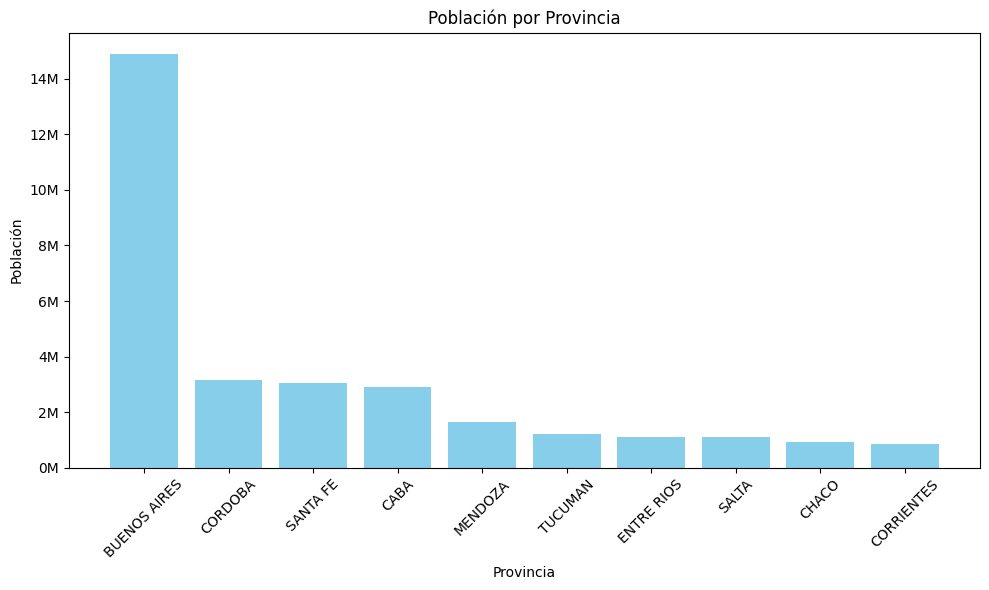

In [22]:
# Gráfico de las 10 provincias con mayor población.

provincias_sup = data_poblacion_top10['Provincia']
poblacion_sup = data_poblacion_top10['Cantidad de Poblacion']

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  
plt.bar(provincias_sup, poblacion_sup, color='skyblue') 
plt.title('Población por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Población')

plt.yscale('linear')
formatter = ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.0f}M')
plt.gca().yaxis.set_major_formatter(formatter)


plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()


In [23]:
# Visualizamos las 10 provincias 
data_poblacion_inf10 = poblacion_provincia.sort_values(by = 'Poblacion').head(10)
data_poblacion_inf10.reset_index(inplace=True)

data_poblacion_inf10 = data_poblacion_inf10.rename(columns={'Poblacion': 'Cantidad de Poblacion'})

data_poblacion_inf10

,index,Provincia,Cantidad de Poblacion
0,22,TIERRA DEL FUEGO,125823
1,19,SANTA CRUZ,268436
2,10,LA PAMPA,302570
3,11,LA RIOJA,319248
4,2,CATAMARCA,343343
5,18,SAN LUIS,410669
6,8,FORMOSA,452714
7,4,CHUBUT,490554
8,14,NEUQUEN,522527
9,15,RIO NEGRO,596964


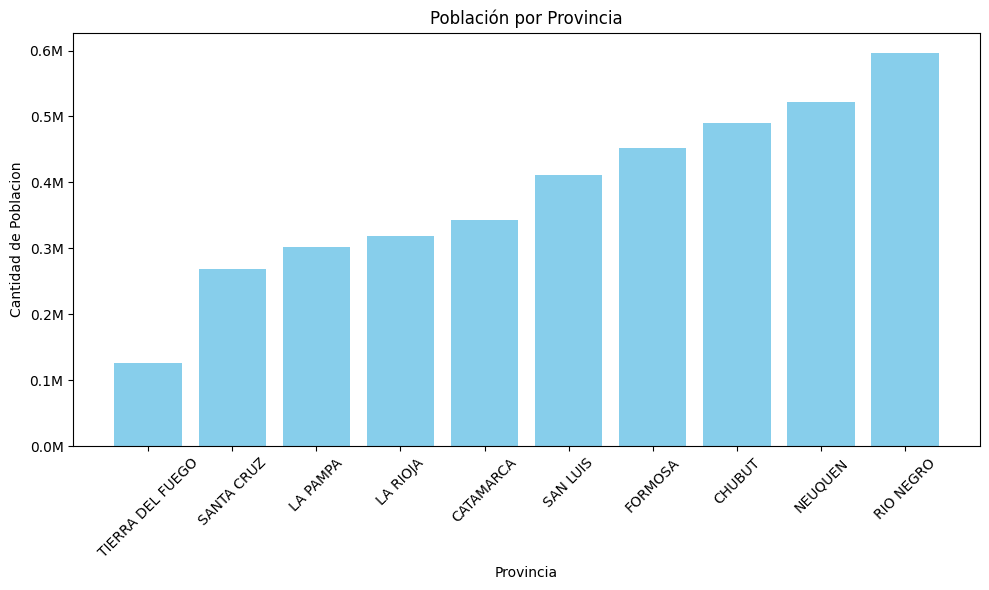

In [24]:
# Gráfico de las 10 provincias con mayor población.

provincias_inf = data_poblacion_inf10['Provincia']
poblacion_inf = data_poblacion_inf10['Cantidad de Poblacion']

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  
plt.bar(provincias_inf, poblacion_inf, color='skyblue') 
plt.title('Población por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de Poblacion')

plt.yscale('linear')
formatter = ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)


plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()

#### Análisis de la variable Partido:

In [25]:
# Cantidad de partidos por provincia

cant_part_provin = data_df.groupby('Provincia')['Partido'].count().reset_index()

cant_part_provin = cant_part_provin.rename(columns={'Partido': 'Cantidad de Partidos'})

cant_part_provin.head(10)

,Provincia,Cantidad de Partidos
0,BUENOS AIRES,900
1,CABA,48
2,CATAMARCA,182
3,CHACO,92
4,CHUBUT,90
5,CORDOBA,556
6,CORRIENTES,78
7,ENTRE RIOS,192
8,FORMOSA,63
9,JUJUY,160


In [26]:
# Cantidad de partidos con el mismo nombre por provincia

cant_part_provin = data_df[['Provincia','Partido']].value_counts().reset_index()
cant_part_provin.head(10)

,Provincia,Partido,0
0,RIO NEGRO,General Roca,70
1,CORDOBA,Santa María,48
2,CORDOBA,San Justo,45
3,SANTA FE,Castellanos,44
4,CORDOBA,Colón,43
5,SAN LUIS,Ayacucho,40
6,CORDOBA,Calamuchita,39
7,ENTRE RIOS,Paraná,36
8,BUENOS AIRES,La Plata,35
9,CORDOBA,Punilla,33


## Merge con distintas tablas de interés

### Merge 1
#### Accesos a Internet fijo por tecnología y localidad
#### Número de accesos al servicio de Internet fijo por tecnología en cada localidad declarada Categoría

##### https://datosabiertos.enacom.gob.ar/dataviews/252830/accesos-a-internet-fijo-por-tecnologia-y-localidad/

In [27]:
# Se carga archivo CSV
to_merge1_a = pd.read_csv('data/AccesosaInternetfijoportecnologíaylocalidad.csv', encoding= "latin-1")


In [28]:
# Se corrige la codificación en columnas específicas
to_merge1_a['Localidad'] = to_merge1_a['Localidad'].str.encode('latin1').str.decode('utf-8')
to_merge1_a['Partido'] = to_merge1_a['Partido'].str.encode('latin1').str.decode('utf-8')

In [29]:
to_merge1_a.sample(10)

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general,Unnamed: 13
651,BUENOS AIRES,Tigre,Tigre,6805010,766,12.467,- 0,4.674,6,6,- 0,176,18.095,NaN
2950,SANTIAGO DEL ESTERO,Banda,Los Quiroga,86035110,- 0,- 0,- 0,- 0,- 0,1,- 0,45,46,NaN
3071,TUCUMAN,Burruyacú,Villa Burruyacú,90007100,- 0,- 0,- 0,12,- 0,3,- 0,3,18,NaN
2038,MISIONES,Leandro N. Alem,Olegario V. Andrade,54070080,- 0,- 0,- 0,- 0,- 0,- 0,- 0,7,7,NaN
1760,LA PAMPA,Trenel,Arata,42147010,- 0,- 0,- 0,1,- 0,1,- 0,256,258,NaN
2966,SANTIAGO DEL ESTERO,Capital,Maquito,86049060,- 0,- 0,- 0,- 0,- 0,1,- 0,43,44,NaN
1405,ENTRE RIOS,Concordia,Osvaldo Magnasco,30015120,- 0,- 0,- 0,- 0,- 0,- 0,- 0,13,13,NaN
785,CHACO,12 de Octubre,General Pinedo,22036030,182,- 0,- 0,538,- 0,2,- 0,1,723,NaN
2276,SALTA,Capital,La Ciénaga y Barrio San Rafael,66028030,- 0,- 0,- 0,- 0,- 0,- 0,- 0,46,46,NaN
688,BUENOS AIRES,Tres De Febrero,Saenz Peña,6840010,229,5.106,- 0,969,- 0,1,- 0,1,6.306,NaN


#### Se crea una columna concatenada Provincia-Partido-Localidad para el Merge.

In [30]:
# Se agrega la columna Key_Merge
to_merge1_a['Key_Merge'] = to_merge1_a['Provincia'] + '-' + to_merge1_a['Partido'] + '-' + to_merge1_a['Localidad']
to_merge1_a.head(3)

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general,Unnamed: 13,Key_Merge
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,874,4.542,- 0,3,- 0,852,- 0,706,6.977,NaN,BUENOS AIRES-25 de Mayo-25 de Mayo
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,- 0,- 0,- 0,10,1,- 0,- 0,192,NaN,BUENOS AIRES-25 de Mayo-Del Valle
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,- 0,- 0,- 0,- 0,- 0,- 0,- 0,181,181,NaN,BUENOS AIRES-25 de Mayo-Gobernador Ugarte


In [31]:
# Se corrobora que no haya registros repetidos

to_merge1_a.Key_Merge.value_counts()

BUENOS AIRES-25 de Mayo-25 de Mayo              1
MISIONES-San Pedro-Tobuna                       1
NEUQUEN-Aluminé-Moquehue                        1
NEUQUEN-Aluminé-Villa Pehuenia                  1
NEUQUEN-Añelo-Añelo                             1
                                               ..
CORDOBA-Marcos Juárez-Guatimozín                1
CORDOBA-Marcos Juárez-Inriville                 1
CORDOBA-Marcos Juárez-Isla Verde                1
CORDOBA-Marcos Juárez-Leones                    1
TUCUMAN-Yerba Buena-Yerba Buena - Marcos Paz    1
Name: Key_Merge, Length: 3137, dtype: int64

In [32]:
columnas  = {'ADSL' : 'Cant_ADSL', 'CABLEMODEM' : 'Cant_Cablemodem', 'DIAL UP' : 'Cant_DialUp',  'FIBRA OPTICA': 'Cant_FibraOptica', 'OTROS': 'Cant_Otros', 'SATELITAL': 'Cant_Satelital' , 'WIMAX' : 'Cant_Wimax' , 'WIRELESS' : 'Cant_Wireless', 'Total general' : 'Total' }

to_merge1_a = to_merge1_a.rename(columns=columnas)
to_merge1_a.sample(3)

,Provincia,Partido,Localidad,Link Indec,Cant_ADSL,Cant_Cablemodem,Cant_DialUp,Cant_FibraOptica,Cant_Otros,Cant_Satelital,Cant_Wimax,Cant_Wireless,Total,Unnamed: 13,Key_Merge
618,BUENOS AIRES,San Isidro,Villa Adelina,6756010,862,10.200,- 0,1.527,7,- 0,- 0,- 0,12.596,NaN,BUENOS AIRES-San Isidro-Villa Adelina
1255,CORDOBA,Santa María,Potrero de Garay,14147230,- 0,- 0,- 0,4,- 0,- 0,- 0,952,956,NaN,CORDOBA-Santa María-Potrero de Garay
137,BUENOS AIRES,Chacabuco,Castilla,6210010,- 0,- 0,- 0,- 0,- 0,- 0,- 0,274,274,NaN,BUENOS AIRES-Chacabuco-Castilla


In [33]:
# Se reemplazan valores

to_merge1_a = to_merge1_a.replace("- 0", 0)
to_merge1_a.sample(5)

,Provincia,Partido,Localidad,Link Indec,Cant_ADSL,Cant_Cablemodem,Cant_DialUp,Cant_FibraOptica,Cant_Otros,Cant_Satelital,Cant_Wimax,Cant_Wireless,Total,Unnamed: 13,Key_Merge
2602,SANTA FE,Caseros,Gödeken,82014080,0,531,0,1,0,0,0,0,532,NaN,SANTA FE-Caseros-Gödeken
943,CORDOBA,Calamuchita,Villa General Belgrano,14007310,0,31,0,0,0,1,0,1.068,1.100,NaN,CORDOBA-Calamuchita-Villa General Belgrano
558,BUENOS AIRES,Quilmes,Bernal,6658010,135,21.188,69,9.489,75,1,0,0,30.957,NaN,BUENOS AIRES-Quilmes-Bernal
2088,NEUQUEN,Añelo,Añelo,58014010,0,3,0,366,0,19,0,366,754,NaN,NEUQUEN-Añelo-Añelo
327,BUENOS AIRES,La Costa,Las Toninas,6420010,435,1.076,2,68,401,0,0,26,2.008,NaN,BUENOS AIRES-La Costa-Las Toninas


In [34]:
# Se realiza un nuevo DataFrame con las columnas de interes

columnas_deseadas = ["Cant_ADSL", "Cant_Cablemodem", "Cant_DialUp", "Cant_FibraOptica", "Cant_Otros", "Cant_Satelital", "Cant_Wimax", "Cant_Wireless", "Total", "Key_Merge"]

to_merge1_a = to_merge1_a[columnas_deseadas]
to_merge1_a.sample(5)

,Cant_ADSL,Cant_Cablemodem,Cant_DialUp,Cant_FibraOptica,Cant_Otros,Cant_Satelital,Cant_Wimax,Cant_Wireless,Total,Key_Merge
1255,0,0,0,4,0,0,0,952,956,CORDOBA-Santa María-Potrero de Garay
35,26,4.296,4,3.253,131,0,0,2,7.712,BUENOS AIRES-Almirante Brown-San Francisco Solano
362,0,12.328,0,318,0,0,0,0,12.646,BUENOS AIRES-La Plata-Manuel B Gonnet
1348,0,0,0,96,0,1,0,34,131,CORRIENTES-Lavalle-Gobernador Juan E. Martínez
1911,0,0,0,0,0,0,0,32,32,MENDOZA-Luján de Cuyo-Las Vegas


In [35]:
# Se realiza el primer merge para agregar la cuantificacion de los tipos de internet

merge1 = pd.merge(data_df, to_merge1_a, on='Key_Merge', how='inner')


In [36]:
merge1.sample(5)

,Provincia,Partido,Localidad,Poblacion,ADSL,Cablemodem,Dial Up,Fibra optica,Satelital,Wireless,...,Key_Merge,Cant_ADSL,Cant_Cablemodem,Cant_DialUp,Cant_FibraOptica,Cant_Otros,Cant_Satelital,Cant_Wimax,Cant_Wireless,Total
1478,SANTA FE,Constitución,Empalme Villa Constitución,6241,1,0,0,0,0,0,...,SANTA FE-Constitución-Empalme Villa Constitución,620,0,0,0,0,0,0,0,620
2390,RIO NEGRO,Ñorquincó,Ñorquincó,565,0,0,0,0,1,0,...,RIO NEGRO-Ñorquincó-Ñorquincó,0,0,0,0,0,7,0,0,7
2023,CORDOBA,Punilla,Valle Hermoso,6187,1,1,0,1,0,1,...,CORDOBA-Punilla-Valle Hermoso,834,62,0,229,0,0,0,116,1.241
145,MENDOZA,Luján de Cuyo,Luján de Cuyo,82615,1,1,1,1,0,1,...,MENDOZA-Luján de Cuyo-Luján de Cuyo,2.450,9,29,4.047,35,0,0,1.827,8.397
1961,ENTRE RIOS,Villaguay,Jubileo,631,0,0,0,1,0,1,...,ENTRE RIOS-Villaguay-Jubileo,0,0,0,16,0,0,0,65,81


In [37]:
# Se visualizan los nombres de las columnas
merge1.columns


Index(['Provincia', 'Partido', 'Localidad', 'Poblacion', 'ADSL', 'Cablemodem',
       'Dial Up', 'Fibra optica', 'Satelital', 'Wireless', 'Telefonia Fija',
       '3G', '4G', 'Link', 'Latitud', 'Longitud', 'Key_Merge', 'Cant_ADSL',
       'Cant_Cablemodem', 'Cant_DialUp', 'Cant_FibraOptica', 'Cant_Otros',
       'Cant_Satelital', 'Cant_Wimax', 'Cant_Wireless', 'Total'],
      dtype='object')

In [38]:
# Se visualiza la cantidad de registros y la cantidad de columnas
merge1.shape

(2974, 26)

## Merge 2
#### Se agrega los datos de poblacion por provincia al DataFrame de base.

In [39]:
merge1.sample(2)

,Provincia,Partido,Localidad,Poblacion,ADSL,Cablemodem,Dial Up,Fibra optica,Satelital,Wireless,...,Key_Merge,Cant_ADSL,Cant_Cablemodem,Cant_DialUp,Cant_FibraOptica,Cant_Otros,Cant_Satelital,Cant_Wimax,Cant_Wireless,Total
1377,ENTRE RIOS,Diamante,Aldea Spatzenkutter,355,0,0,0,0,0,1,...,ENTRE RIOS-Diamante-Aldea Spatzenkutter,0,0,0,0,0,0,0,45,45
982,BUENOS AIRES,San Isidro,Villa Adelina,35473,1,1,0,1,0,0,...,BUENOS AIRES-San Isidro-Villa Adelina,862,10.200,0,1.527,7,0,0,0,12.596


In [40]:
# Se agrega una columna con la poblacion total de la provincia de cada registro utilizando el diccionario "diccionario_poblacion" construido previamente

merge2 = merge1
merge2['Pob_prov'] = merge2['Provincia']
merge2['Pob_prov'] = merge2['Provincia'].map(diccionario_poblacion)
merge2 = merge2.rename(columns={'Pob_prov': 'Pob_prov_2020'})
merge2.sample(5)

,Provincia,Partido,Localidad,Poblacion,ADSL,Cablemodem,Dial Up,Fibra optica,Satelital,Wireless,...,Cant_ADSL,Cant_Cablemodem,Cant_DialUp,Cant_FibraOptica,Cant_Otros,Cant_Satelital,Cant_Wimax,Cant_Wireless,Total,Pob_prov_2020
2064,RIO NEGRO,General Roca,Barrio Fátima,136,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,3,596964
1344,BUENOS AIRES,Lobos,Salvador María,830,1,0,0,1,0,1,...,87,0,0,446,0,0,0,265,798,14911542
1009,CORDOBA,Cruz del Eje,Tuclame,907,0,0,0,1,0,1,...,0,0,0,0,0,0,0,13,13,3139606
1528,SANTIAGO DEL ESTERO,Río Hondo,Termas de Río Hondo,32166,1,0,0,1,1,1,...,2.433,0,0,3,80,1,0,377,2.894,671932
218,BUENOS AIRES,General San Martín,Villa Yapeyú,3654,0,1,0,1,0,0,...,0,276,0,470,0,0,0,0,746,14911542


In [41]:
# Se verifica el total de registros y columnas
merge2.shape

(2974, 27)

### Merge 3
#### Accesos a internet por cada 100 habitantes por provincia, año y trimestre
#### Accesos a internet por cada 100 hogares por provincia, año y trimestre

In [42]:
# Se carga archivo CSV
to_merge3_hab = pd.read_csv('data/Internet_Penetracion_hab_prov.csv', encoding= "latin-1")
to_merge3_hog = pd.read_csv('data/Internet_Penetracion_hog_prov.csv', encoding= "latin-1")

In [43]:
to_merge3_hab.sample(5)

,AÃ±o,Trimestre,Provincia,Accesos por cada 100 hab
861,2014,1,Santiago Del Estero,4
342,2019,2,Corrientes,10
127,2021,3,Entre RÃ­os,19
178,2021,1,La Pampa,27
520,2017,3,Salta,10


In [44]:
to_merge3_hog.sample(5)

,AÃ±o,Trimestre,Provincia,Accesos por cada 100 hogares
235,2020,3,Santa Cruz,"35,95"
755,2015,1,La Rioja,"16,7"
459,2018,1,Chaco,"30,83"
204,2020,4,Mendoza,"38,63"
275,2020,1,La Rioja,"46,35"


In [45]:
# Se corrigen los encoding
to_merge3_hog['Provincia'] = to_merge3_hog['Provincia'].str.encode('latin1').str.decode('utf-8')
to_merge3_hab['Provincia'] = to_merge3_hab['Provincia'].str.encode('latin1').str.decode('utf-8')

# Se corrige el nombre del campo año
to_merge3_hab = to_merge3_hab.rename(columns={'AÃ±o': 'Year', 'Accesos por cada 100 hab': 'Acc_cada_100_hab'})
to_merge3_hog = to_merge3_hog.rename(columns={'AÃ±o': 'Year', 'Accesos por cada 100 hogares': 'Acc_cada_100_hog'})

# Se pasan a mayusculas todos los registros del campo Provincia en vistas a realizar el merge por provincia
to_merge3_hog['Provincia'] = to_merge3_hog['Provincia'].str.upper()
to_merge3_hab['Provincia'] = to_merge3_hab['Provincia'].str.upper()

# Se corrigen las tildes

a_reemplazar = {'TUCUMÁN': 'TUCUMAN', 'CÓRDOBA': 'CORDOBA' , 'NEUQUÉN': 'NEUQUEN', 'ENTRE RÍOS': 'ENTRE RIOS', 'RÍO NEGRO': 'RIO NEGRO'}

to_merge3_hog['Provincia'] = to_merge3_hog['Provincia'].replace(a_reemplazar)
to_merge3_hab['Provincia'] = to_merge3_hab['Provincia'].replace(a_reemplazar)


# Se modifican los formatos para realizar la concatenación de columnas "KEY"

to_merge3_hab['Year'] = to_merge3_hab['Year'].astype(str)
to_merge3_hab['Trimestre'] = to_merge3_hab['Trimestre'].astype(str)

to_merge3_hog['Year'] = to_merge3_hog['Year'].astype(str)
to_merge3_hog['Trimestre'] = to_merge3_hog['Trimestre'].astype(str)

# Se concatena una serie de datos en "KEY"
to_merge3_hab['Key'] = to_merge3_hab['Year'] + '-' + to_merge3_hab['Trimestre'] + '-' + to_merge3_hab['Provincia']
to_merge3_hog['Key'] = to_merge3_hog['Year'] + '-' + to_merge3_hog['Trimestre'] + '-' + to_merge3_hog['Provincia']

In [46]:
# Se Verifica que el procesamiento sea correcto
to_merge3_hab.sample(5)

,Year,Trimestre,Provincia,Acc_cada_100_hab,Key
665,2016,1,SAN JUAN,7,2016-1-SAN JUAN
491,2017,4,LA RIOJA,14,2017-4-LA RIOJA
789,2014,4,SANTIAGO DEL ESTERO,4,2014-4-SANTIAGO DEL ESTERO
553,2017,1,CAPITAL FEDERAL,46,2017-1-CAPITAL FEDERAL
820,2014,2,CHUBUT,13,2014-2-CHUBUT


In [47]:
# Se Verifica que el procesamiento sea correcto
to_merge3_hog.sample(5)

,Year,Trimestre,Provincia,Acc_cada_100_hog,Key
360,2019,1,BUENOS AIRES,"66,24",2019-1-BUENOS AIRES
378,2019,1,SAN LUIS,"67,34",2019-1-SAN LUIS
655,2016,1,ENTRE RIOS,"43,85",2016-1-ENTRE RIOS
64,2022,2,SALTA,"57,54",2022-2-SALTA
788,2014,4,SANTA FE,50,2014-4-SANTA FE


In [48]:
# Se realiza el merge de las 2 tablas con información de interes
to_merge3= pd.merge(to_merge3_hog, to_merge3_hab, on='Key', how='right')
to_merge3.sample(10)

,Year_x,Trimestre_x,Provincia_x,Acc_cada_100_hog,Key,Year_y,Trimestre_y,Provincia_y,Acc_cada_100_hab
412,2018,3,CHUBUT,"56,39",2018-3-CHUBUT,2018,3,CHUBUT,17
604,2016,3,CHUBUT,"36,18",2016-3-CHUBUT,2016,3,CHUBUT,11
199,2020,4,ENTRE RIOS,"59,47",2020-4-ENTRE RIOS,2020,4,ENTRE RIOS,18
635,2016,2,LA RIOJA,"16,88",2016-2-LA RIOJA,2016,2,LA RIOJA,4
567,2017,1,RIO NEGRO,"46,03",2017-1-RIO NEGRO,2017,1,RIO NEGRO,14
299,2019,4,LA RIOJA,"47,14",2019-4-LA RIOJA,2019,4,LA RIOJA,13
629,2016,2,CORDOBA,"57,55",2016-2-CORDOBA,2016,2,CORDOBA,18
790,2014,4,TIERRA DEL FUEGO,"66,14",2014-4-TIERRA DEL FUEGO,2014,4,TIERRA DEL FUEGO,19
558,2017,1,CORRIENTES,"30,94",2017-1-CORRIENTES,2017,1,CORRIENTES,8
582,2016,4,CORRIENTES,"30,98",2016-4-CORRIENTES,2016,4,CORRIENTES,8


In [49]:
# Se seleccionan y se renombran las columnas de interes

to_merge3 = to_merge3[['Year_x', 'Trimestre_x', 'Provincia_x', 'Acc_cada_100_hog', 'Acc_cada_100_hab']]
to_merge3 = to_merge3.rename(columns={'Year_x':'Year','Trimestre_x':'Trimestre','Provincia_x': 'Provincia'})
to_merge3.sample(10)

,Year,Trimestre,Provincia,Acc_cada_100_hog,Acc_cada_100_hab
472,2018,1,SALTA,"39,78",10
68,2022,2,SANTA FE,"77,9",24
57,2022,2,JUJUY,"57,32",15
278,2020,1,NEUQUEN,"61,85",18
361,2019,1,CAPITAL FEDERAL,"109,2",46
565,2017,1,MISIONES,"29,52",8
381,2019,1,SANTIAGO DEL ESTERO,"37,52",9
799,2014,3,ENTRE RIOS,"34,98",10
604,2016,3,CHUBUT,"36,18",11
652,2016,1,CHUBUT,"36,09",11


In [50]:
# Se realiza el Merge con el Merge anterior llamado "merge2" y el Merge de accesos cada 100 habitantes y cada 100 hogares.
merge3= pd.merge(to_merge3, merge2, on='Provincia', how='inner')
merge3.sample(5)

,Year,Trimestre,Provincia,Acc_cada_100_hog,Acc_cada_100_hab,Partido,Localidad,Poblacion,ADSL,Cablemodem,...,Cant_ADSL,Cant_Cablemodem,Cant_DialUp,Cant_FibraOptica,Cant_Otros,Cant_Satelital,Cant_Wimax,Cant_Wireless,Total,Pob_prov_2020
30539,2022,4,CORDOBA,"89,03",27,San Justo,Villa del Tránsito,227,0,0,...,0,0,0,0,0,0,0,65,65,3139606
15243,2017,1,BUENOS AIRES,"58,57",19,Tigre,Don Torcuato Este,38359,1,1,...,1.293,13.472,3,9.823,6,0,0,23,24.620,14911542
92701,2019,1,SANTA FE,"66,97",21,General López,La Chispa,352,0,0,...,0,0,0,0,0,0,0,71,71,3055611
17922,2016,1,BUENOS AIRES,"57,34",18,Esteban Echeverría,Zona Aeropuerto Internacional Ezeiza,14,1,0,...,2,0,0,0,0,0,0,0,2,14911542
34808,2020,1,CORDOBA,"70,69",22,Tercero Arriba,Oliva,11672,1,0,...,1.473,0,0,1.893,0,0,0,162,3.528,3139606


In [51]:
merge3.shape

(107064, 31)

In [52]:
merge3.columns

Index(['Year', 'Trimestre', 'Provincia', 'Acc_cada_100_hog',
       'Acc_cada_100_hab', 'Partido', 'Localidad', 'Poblacion', 'ADSL',
       'Cablemodem', 'Dial Up', 'Fibra optica', 'Satelital', 'Wireless',
       'Telefonia Fija', '3G', '4G', 'Link', 'Latitud', 'Longitud',
       'Key_Merge', 'Cant_ADSL', 'Cant_Cablemodem', 'Cant_DialUp',
       'Cant_FibraOptica', 'Cant_Otros', 'Cant_Satelital', 'Cant_Wimax',
       'Cant_Wireless', 'Total', 'Pob_prov_2020'],
      dtype='object')

### Merge 4
#### Salarios promedio y mediano, por provincia 


In [53]:
# Se carga archivo CSV
to_merge4_a = pd.read_csv('data/w_mean_todos.csv', encoding= "latin-1")

In [54]:
to_merge4_a

,fecha,zona_prov,w_mean
0,2013-01-01,BUENOS AIRES,7776
1,2013-01-01,CAPITAL FEDERAL,9675
2,2013-01-01,CATAMARCA,6416
3,2013-01-01,CHACO,6531
4,2013-01-01,CHUBUT,11452
...,...,...,...
2995,2023-05-01,SANTA CRUZ,555954
2996,2023-05-01,SANTA FE,306596
2997,2023-05-01,SANTIAGO DEL ESTERO,193229
2998,2023-05-01,TIERRA DEL FUEGO,449830


In [55]:
to_merge4_a['fecha'] = pd.to_datetime(to_merge4_a['fecha'])

In [56]:
to_merge4_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   fecha      3000 non-null   datetime64[ns]
 1   zona_prov  3000 non-null   object        
 2   w_mean     3000 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 70.4+ KB


In [57]:
to_merge4_b = to_merge4_a.groupby([to_merge4_a['fecha'].dt.year, 'zona_prov'])['w_mean'].sum().reset_index()
to_merge4_b

,fecha,zona_prov,w_mean
0,2013,BUENOS AIRES,107675
1,2013,CAPITAL FEDERAL,132192
2,2013,CATAMARCA,90296
3,2013,CHACO,92725
4,2013,CHUBUT,157507
...,...,...,...
259,2023,SANTA CRUZ,2487857
260,2023,SANTA FE,1354556
261,2023,SANTIAGO DEL ESTERO,859482
262,2023,TIERRA DEL FUEGO,1937739


In [58]:
# Se extraen los datos del 2013 y 2023
to_merge4_c = to_merge4_b[(to_merge4_b['fecha'] >2013) & (to_merge4_b['fecha'] < 2023)]
to_merge4_c.reset_index(inplace=True)
to_merge4_c

,index,fecha,zona_prov,w_mean
0,24,2014,BUENOS AIRES,143189
1,25,2014,CAPITAL FEDERAL,174206
2,26,2014,CATAMARCA,116585
3,27,2014,CHACO,122756
4,28,2014,CHUBUT,216384
...,...,...,...,...
211,235,2022,SANTA CRUZ,3884898
212,236,2022,SANTA FE,2065082
213,237,2022,SANTIAGO DEL ESTERO,1257118
214,238,2022,TIERRA DEL FUEGO,2935993


In [59]:
to_merge4_c.columns


Index(['index', 'fecha', 'zona_prov', 'w_mean'], dtype='object')

In [60]:
to_merge4_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      216 non-null    int64 
 1   fecha      216 non-null    int64 
 2   zona_prov  216 non-null    object
 3   w_mean     216 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.9+ KB


In [61]:
to_merge4_c.sample(10)

,index,fecha,zona_prov,w_mean
57,81,2016,JUJUY,186312
85,109,2017,MISIONES,263750
199,223,2022,ENTRE RIOS,1823293
193,217,2022,CAPITAL FEDERAL,2666520
210,234,2022,SAN LUIS,1893051
36,60,2015,MENDOZA,166328
37,61,2015,MISIONES,154311
59,83,2016,LA RIOJA,165539
71,95,2016,TUCUMAN,182436
29,53,2015,CORDOBA,183843


In [62]:
# Se modifican los formatos para realizar la concatenación de columnas "KEY"

to_merge4_c['fecha'] = to_merge4_c['fecha'].astype(str)
to_merge4_c['zona_prov'] = to_merge4_c['zona_prov'].astype(str)


In [63]:
# Se realiza la concatenación de columnas "Key_w_year_prov"
to_merge4_c['Key_w_year_prov'] = to_merge4_c['fecha'] + '-' + to_merge4_c['zona_prov']
to_merge4_c = to_merge4_c[['fecha', 'zona_prov', 'w_mean', 'Key_w_year_prov']]
to_merge4_c

,fecha,zona_prov,w_mean,Key_w_year_prov
0,2014,BUENOS AIRES,143189,2014-BUENOS AIRES
1,2014,CAPITAL FEDERAL,174206,2014-CAPITAL FEDERAL
2,2014,CATAMARCA,116585,2014-CATAMARCA
3,2014,CHACO,122756,2014-CHACO
4,2014,CHUBUT,216384,2014-CHUBUT
...,...,...,...,...
211,2022,SANTA CRUZ,3884898,2022-SANTA CRUZ
212,2022,SANTA FE,2065082,2022-SANTA FE
213,2022,SANTIAGO DEL ESTERO,1257118,2022-SANTIAGO DEL ESTERO
214,2022,TIERRA DEL FUEGO,2935993,2022-TIERRA DEL FUEGO


In [64]:
# Al DF merge 3 se realiza la concatenación de columnas "Key_w_year_prov", para que coincida con to_merge4_c

# Se modifican los formatos para realizar la concatenación de columnas "Key_w_year_prov"
merge3['Year'] = merge3['Year'].astype(str)

# Se realiza la concatenacion para la creacion de la columna "Key_w_year_prov"
merge3['Key_w_year_prov'] = merge3['Year'] + '-' + merge3['Provincia']
merge3

,Year,Trimestre,Provincia,Acc_cada_100_hog,Acc_cada_100_hab,Partido,Localidad,Poblacion,ADSL,Cablemodem,...,Cant_Cablemodem,Cant_DialUp,Cant_FibraOptica,Cant_Otros,Cant_Satelital,Cant_Wimax,Cant_Wireless,Total,Pob_prov_2020,Key_w_year_prov
0,2022,4,BUENOS AIRES,"78,94",27,9 de Julio,Dudignac,2670,0,0,...,0,1,0,0,0,0,463,464,14911542,2022-BUENOS AIRES
1,2022,4,BUENOS AIRES,"78,94",27,9 de Julio,Patricios,745,1,0,...,0,0,0,0,0,0,0,81,14911542,2022-BUENOS AIRES
2,2022,4,BUENOS AIRES,"78,94",27,Adolfo Alsina,Carhué,9660,1,0,...,0,1,1.417,1,0,0,283,2.482,14911542,2022-BUENOS AIRES
3,2022,4,BUENOS AIRES,"78,94",27,Adolfo Alsina,Colonia San Miguel Arcángel,563,0,0,...,0,0,208,0,0,0,0,208,14911542,2022-BUENOS AIRES
4,2022,4,BUENOS AIRES,"78,94",27,Azul,Azul,55728,1,1,...,13.918,51,56,65,2,0,1.145,17.661,14911542,2022-BUENOS AIRES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107059,2014,1,TUCUMAN,"33,42",8,Monteros,Capitán Cáceres,513,0,0,...,0,0,0,0,0,0,40,40,1210114,2014-TUCUMAN
107060,2014,1,TUCUMAN,"33,42",8,Monteros,Monteros,23274,1,0,...,0,0,20,0,0,0,226,2.052,1210114,2014-TUCUMAN
107061,2014,1,TUCUMAN,"33,42",8,Monteros,Pueblo Independencia,3530,1,0,...,0,0,0,0,0,0,0,4,1210114,2014-TUCUMAN
107062,2014,1,TUCUMAN,"33,42",8,Monteros,Río Seco,5131,1,0,...,0,0,6,0,0,0,330,349,1210114,2014-TUCUMAN


In [65]:
merge4 = pd.merge(merge3, to_merge4_c, on='Key_w_year_prov', how='inner')
merge4.sample(5)

,Year,Trimestre,Provincia,Acc_cada_100_hog,Acc_cada_100_hab,Partido,Localidad,Poblacion,ADSL,Cablemodem,...,Cant_Otros,Cant_Satelital,Cant_Wimax,Cant_Wireless,Total,Pob_prov_2020,Key_w_year_prov,fecha,zona_prov,w_mean
2674,2021,4,BUENOS AIRES,"75,66",25,La Plata,ruta del sol,2312,1,0,...,0,0,0,0,292,14911542,2021-BUENOS AIRES,2021,BUENOS AIRES,1237839
103684,2015,3,SANTIAGO DEL ESTERO,"17,12",4,Choya,Villa La Punta,819,0,0,...,0,1,0,5,10,671932,2015-SANTIAGO DEL ESTERO,2015,SANTIAGO DEL ESTERO,119682
80984,2021,2,SAN JUAN,"39,28",10,Caucete,Bermejo,484,0,0,...,0,1,0,0,1,631000,2021-SAN JUAN,2021,SAN JUAN,1095488
40946,2016,1,CORDOBA,"55,28",17,Calamuchita,Villa Ciudad Parque Los Reartes (3a. Sección),0,0,0,...,0,0,0,8,8,3139606,2016-CORDOBA,2016,CORDOBA,245372
88539,2022,1,SANTA FE,"77,3",24,San Lorenzo,Fray Luis Beltrán,15176,1,1,...,0,0,0,0,3.188,3055611,2022-SANTA FE,2022,SANTA FE,2065082


## LIMPIEZA DEL DATAFRAME RESULTANTE: MERGE4 

In [66]:
# Se genera un nuevo DF
df_completo = merge4

In [67]:
df_completo

,Year,Trimestre,Provincia,Acc_cada_100_hog,Acc_cada_100_hab,Partido,Localidad,Poblacion,ADSL,Cablemodem,...,Cant_Otros,Cant_Satelital,Cant_Wimax,Cant_Wireless,Total,Pob_prov_2020,Key_w_year_prov,fecha,zona_prov,w_mean
0,2022,4,BUENOS AIRES,"78,94",27,9 de Julio,Dudignac,2670,0,0,...,0,0,0,463,464,14911542,2022-BUENOS AIRES,2022,BUENOS AIRES,2136200
1,2022,4,BUENOS AIRES,"78,94",27,9 de Julio,Patricios,745,1,0,...,0,0,0,0,81,14911542,2022-BUENOS AIRES,2022,BUENOS AIRES,2136200
2,2022,4,BUENOS AIRES,"78,94",27,Adolfo Alsina,Carhué,9660,1,0,...,1,0,0,283,2.482,14911542,2022-BUENOS AIRES,2022,BUENOS AIRES,2136200
3,2022,4,BUENOS AIRES,"78,94",27,Adolfo Alsina,Colonia San Miguel Arcángel,563,0,0,...,0,0,0,0,208,14911542,2022-BUENOS AIRES,2022,BUENOS AIRES,2136200
4,2022,4,BUENOS AIRES,"78,94",27,Azul,Azul,55728,1,1,...,65,2,0,1.145,17.661,14911542,2022-BUENOS AIRES,2022,BUENOS AIRES,2136200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107059,2014,1,TUCUMAN,"33,42",8,Monteros,Capitán Cáceres,513,0,0,...,0,0,0,40,40,1210114,2014-TUCUMAN,2014,TUCUMAN,106227
107060,2014,1,TUCUMAN,"33,42",8,Monteros,Monteros,23274,1,0,...,0,0,0,226,2.052,1210114,2014-TUCUMAN,2014,TUCUMAN,106227
107061,2014,1,TUCUMAN,"33,42",8,Monteros,Pueblo Independencia,3530,1,0,...,0,0,0,0,4,1210114,2014-TUCUMAN,2014,TUCUMAN,106227
107062,2014,1,TUCUMAN,"33,42",8,Monteros,Río Seco,5131,1,0,...,0,0,0,330,349,1210114,2014-TUCUMAN,2014,TUCUMAN,106227


In [68]:
df_completo.columns

Index(['Year', 'Trimestre', 'Provincia', 'Acc_cada_100_hog',
       'Acc_cada_100_hab', 'Partido', 'Localidad', 'Poblacion', 'ADSL',
       'Cablemodem', 'Dial Up', 'Fibra optica', 'Satelital', 'Wireless',
       'Telefonia Fija', '3G', '4G', 'Link', 'Latitud', 'Longitud',
       'Key_Merge', 'Cant_ADSL', 'Cant_Cablemodem', 'Cant_DialUp',
       'Cant_FibraOptica', 'Cant_Otros', 'Cant_Satelital', 'Cant_Wimax',
       'Cant_Wireless', 'Total', 'Pob_prov_2020', 'Key_w_year_prov', 'fecha',
       'zona_prov', 'w_mean'],
      dtype='object')

In [69]:
# Se seleccionan las columnas de interes y se renombran

df_completo = df_completo[['Year', 'Trimestre', 'Provincia', 'Partido', 'Localidad', 'Poblacion', 'Acc_cada_100_hog','Acc_cada_100_hab',  'ADSL','Cablemodem', 'Dial Up', 'Fibra optica', 'Satelital', 'Wireless','Telefonia Fija', '3G', '4G','Cant_ADSL', 'Cant_Cablemodem', 'Cant_DialUp','Cant_FibraOptica', 'Cant_Otros', 'Cant_Satelital', 'Cant_Wimax', 'Cant_Wireless', 'Total', 'Pob_prov_2020', 'w_mean', 'Latitud', 'Longitud']]
df_completo = df_completo.rename(columns= {'Trimestre': 'Quarter', 'Poblacion': 'Poblacion_2022', 'ADSL': 'ADSL_2022',  'Cablemodem' : 'Cablemodem_2022' ,'Dial Up': 'Dial Up_2022', 'Fibra optica': 'Fibra optica_2022' , 'Satelital': 'Satelital_2022'  , 'Wireless': 'Wireless_2022','Telefonia Fija' : 'Telefonia Fija_2022', '3G': '3G_2022' , '4G' : '4G_2022','Cant_ADSL': 'Cant_ADSL_2022', 'Cant_Cablemodem' : 'Cant_Cablemodem_2022', 'Cant_DialUp': 'Cant_DialUp_2022', 'Cant_FibraOptica': 'Cant_FibraOptica_2022', 'Cant_Otros' : 'Cant_Otros_2022', 'Cant_Satelital' :  'Cant_Satelital_2022', 'Cant_Wimax': 'Cant_Wimax_2022', 'Cant_Wireless': 'Cant_Wireless_2022', 'Total': 'Total_2022', 'Pob_prov_2020': 'Pob_prov_2022', 'w_mean' : 'Salario_promedio'})
df_completo

,Year,Quarter,Provincia,Partido,Localidad,Poblacion_2022,Acc_cada_100_hog,Acc_cada_100_hab,ADSL_2022,Cablemodem_2022,...,Cant_FibraOptica_2022,Cant_Otros_2022,Cant_Satelital_2022,Cant_Wimax_2022,Cant_Wireless_2022,Total_2022,Pob_prov_2022,Salario_promedio,Latitud,Longitud
0,2022,4,BUENOS AIRES,9 de Julio,Dudignac,2670,"78,94",27,0,0,...,0,0,0,0,463,464,14911542,2136200,-35.651193,-60.709896
1,2022,4,BUENOS AIRES,9 de Julio,Patricios,745,"78,94",27,1,0,...,0,0,0,0,0,81,14911542,2136200,-35.439553,-60.717438
2,2022,4,BUENOS AIRES,Adolfo Alsina,Carhué,9660,"78,94",27,1,0,...,1.417,1,0,0,283,2.482,14911542,2136200,-37.177480,-62.757896
3,2022,4,BUENOS AIRES,Adolfo Alsina,Colonia San Miguel Arcángel,563,"78,94",27,0,0,...,208,0,0,0,0,208,14911542,2136200,-37.448619,-63.117609
4,2022,4,BUENOS AIRES,Azul,Azul,55728,"78,94",27,1,1,...,56,65,2,0,1.145,17.661,14911542,2136200,-36.779514,-59.858633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107059,2014,1,TUCUMAN,Monteros,Capitán Cáceres,513,"33,42",8,0,0,...,0,0,0,0,40,40,1210114,106227,-27.189522,-65.603965
107060,2014,1,TUCUMAN,Monteros,Monteros,23274,"33,42",8,1,0,...,20,0,0,0,226,2.052,1210114,106227,-27.167477,-65.498777
107061,2014,1,TUCUMAN,Monteros,Pueblo Independencia,3530,"33,42",8,1,0,...,0,0,0,0,0,4,1210114,106227,-27.220785,-65.527417
107062,2014,1,TUCUMAN,Monteros,Río Seco,5131,"33,42",8,1,0,...,6,0,0,0,330,349,1210114,106227,-27.269048,-65.559346


In [70]:
df_completo.columns

Index(['Year', 'Quarter', 'Provincia', 'Partido', 'Localidad',
       'Poblacion_2022', 'Acc_cada_100_hog', 'Acc_cada_100_hab', 'ADSL_2022',
       'Cablemodem_2022', 'Dial Up_2022', 'Fibra optica_2022',
       'Satelital_2022', 'Wireless_2022', 'Telefonia Fija_2022', '3G_2022',
       '4G_2022', 'Cant_ADSL_2022', 'Cant_Cablemodem_2022', 'Cant_DialUp_2022',
       'Cant_FibraOptica_2022', 'Cant_Otros_2022', 'Cant_Satelital_2022',
       'Cant_Wimax_2022', 'Cant_Wireless_2022', 'Total_2022', 'Pob_prov_2022',
       'Salario_promedio', 'Latitud', 'Longitud'],
      dtype='object')

In [72]:
# Se realiza el procedimiento para modificar eliminar los puntos como separadores de miles.
df_completo['Cant_ADSL_2022'] = df_completo['Cant_ADSL_2022'].str.replace('.','',regex=True)
df_completo['Cant_Cablemodem_2022'] = df_completo['Cant_Cablemodem_2022'].str.replace('.','',regex=True)
df_completo['Cant_DialUp_2022'] = df_completo['Cant_DialUp_2022'].str.replace('.','',regex=True)
df_completo['Cant_FibraOptica_2022'] = df_completo['Cant_FibraOptica_2022'].str.replace('.','',regex=True)
df_completo['Cant_Otros_2022'] = df_completo['Cant_Otros_2022'].str.replace('.','',regex=True)
df_completo['Cant_Satelital_2022'] = df_completo['Cant_Satelital_2022'].str.replace('.','',regex=True)
df_completo['Cant_Wimax_2022'] = df_completo['Cant_Wimax_2022'].str.replace('.','',regex=True)
df_completo['Cant_Wireless_2022'] = df_completo['Cant_Wireless_2022'].str.replace('.','',regex=True)
df_completo['Total_2022'] = df_completo['Total_2022'].str.replace('.','',regex=True)
df_completo['Acc_cada_100_hog'] = df_completo['Acc_cada_100_hog'].str.replace(',','.',regex=True)

# Al realizar el proceso anterior, los campos vacios quedan NaN. Por ello se los reemplaza por 0.
columnas_a_replazar = ['Cant_ADSL_2022', 'Cant_Cablemodem_2022', 'Cant_DialUp_2022',
       'Cant_FibraOptica_2022', 'Cant_Otros_2022', 'Cant_Satelital_2022',
       'Cant_Wimax_2022', 'Cant_Wireless_2022', 'Total_2022']
df_completo[columnas_a_replazar] = df_completo[columnas_a_replazar].fillna(0)

# Se convierte nuevamente las columnas a numérico.
columnas_a_convertir = ['Acc_cada_100_hog','Cant_ADSL_2022', 'Cant_Cablemodem_2022', 'Cant_DialUp_2022',
       'Cant_FibraOptica_2022', 'Cant_Otros_2022', 'Cant_Satelital_2022',
       'Cant_Wimax_2022', 'Cant_Wireless_2022', 'Total_2022', 'Year', 'Quarter']
df_completo[columnas_a_convertir] = df_completo[columnas_a_convertir].apply(pd.to_numeric)
df_completo['Acc_cada_100_hog'] = df_completo['Acc_cada_100_hog'].apply(pd.to_numeric)

In [71]:
# Se visualiza que todos los campos tengan el formato correspondiente
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107064 entries, 0 to 107063
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Year                   107064 non-null  object 
 1   Quarter                107064 non-null  object 
 2   Provincia              107064 non-null  object 
 3   Partido                107064 non-null  object 
 4   Localidad              107064 non-null  object 
 5   Poblacion_2022         107064 non-null  int64  
 6   Acc_cada_100_hog       107064 non-null  object 
 7   Acc_cada_100_hab       107064 non-null  int64  
 8   ADSL_2022              107064 non-null  object 
 9   Cablemodem_2022        107064 non-null  object 
 10  Dial Up_2022           107064 non-null  object 
 11  Fibra optica_2022      107064 non-null  object 
 12  Satelital_2022         107064 non-null  object 
 13  Wireless_2022          107064 non-null  object 
 14  Telefonia Fija_2022    107064 non-nu

In [72]:
#df_completo.to_csv('dataframe_completo.csv', index=False)

In [73]:
df_completo

,Year,Quarter,Provincia,Partido,Localidad,Poblacion_2022,Acc_cada_100_hog,Acc_cada_100_hab,ADSL_2022,Cablemodem_2022,...,Cant_FibraOptica_2022,Cant_Otros_2022,Cant_Satelital_2022,Cant_Wimax_2022,Cant_Wireless_2022,Total_2022,Pob_prov_2022,Salario_promedio,Latitud,Longitud
0,2022,4,BUENOS AIRES,9 de Julio,Dudignac,2670,"78,94",27,0,0,...,0,0,0,0,463,464,14911542,2136200,-35.651193,-60.709896
1,2022,4,BUENOS AIRES,9 de Julio,Patricios,745,"78,94",27,1,0,...,0,0,0,0,0,81,14911542,2136200,-35.439553,-60.717438
2,2022,4,BUENOS AIRES,Adolfo Alsina,Carhué,9660,"78,94",27,1,0,...,1.417,1,0,0,283,2.482,14911542,2136200,-37.177480,-62.757896
3,2022,4,BUENOS AIRES,Adolfo Alsina,Colonia San Miguel Arcángel,563,"78,94",27,0,0,...,208,0,0,0,0,208,14911542,2136200,-37.448619,-63.117609
4,2022,4,BUENOS AIRES,Azul,Azul,55728,"78,94",27,1,1,...,56,65,2,0,1.145,17.661,14911542,2136200,-36.779514,-59.858633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107059,2014,1,TUCUMAN,Monteros,Capitán Cáceres,513,"33,42",8,0,0,...,0,0,0,0,40,40,1210114,106227,-27.189522,-65.603965
107060,2014,1,TUCUMAN,Monteros,Monteros,23274,"33,42",8,1,0,...,20,0,0,0,226,2.052,1210114,106227,-27.167477,-65.498777
107061,2014,1,TUCUMAN,Monteros,Pueblo Independencia,3530,"33,42",8,1,0,...,0,0,0,0,0,4,1210114,106227,-27.220785,-65.527417
107062,2014,1,TUCUMAN,Monteros,Río Seco,5131,"33,42",8,1,0,...,6,0,0,0,330,349,1210114,106227,-27.269048,-65.559346


# Exploración Correlaciones y Regresión Logística

In [91]:
#
pd.set_option('display.float_format', '{:.4f}'.format)
df_correlacion = df_completo.corr(numeric_only=True)
df_correlacion

,Poblacion_2022,Acc_cada_100_hab,Pob_prov_2022,Salario_promedio,Latitud,Longitud
Poblacion_2022,1.0000,0.0449,0.1302,0.0073,-0.0334,0.0860
Acc_cada_100_hab,0.0449,1.0000,0.4780,0.5348,-0.4623,0.2068
Pob_prov_2022,0.1302,0.4780,1.0000,0.0544,-0.3445,0.4845
Salario_promedio,0.0073,0.5348,0.0544,1.0000,-0.1559,-0.0217
Latitud,-0.0334,-0.4623,-0.3445,-0.1559,1.0000,0.1306
Longitud,0.0860,0.2068,0.4845,-0.0217,0.1306,1.0000


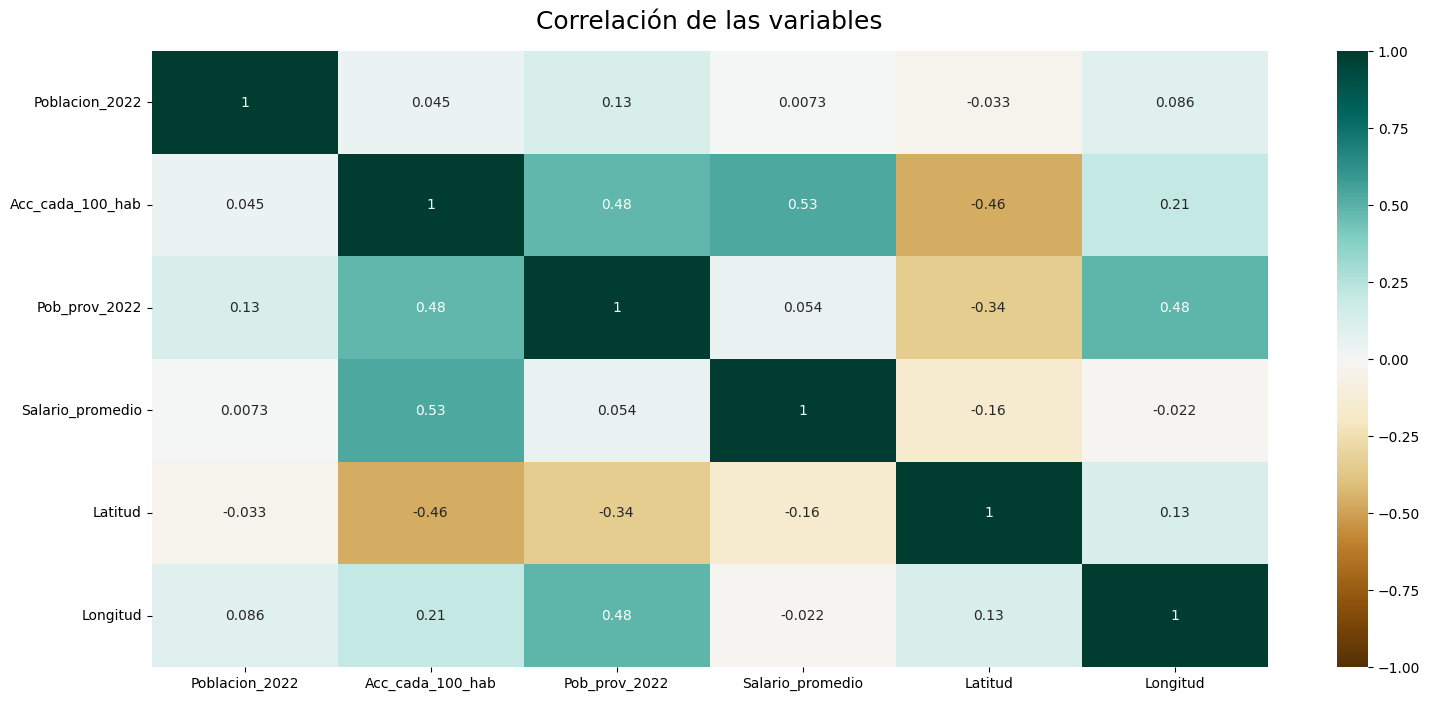

In [92]:
# Grafico de correlaciones. Se estima que la variable a predecir es Total_2022
pd.set_option('display.float_format', '{:.4f}'.format)

plt.figure(figsize=(18, 8))
heatmap = sns.heatmap(df_correlacion, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlación de las variables', fontdict={'fontsize':18}, pad=16);

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Definimos las variables de entrada (X) y la variable objetivo (y)
X = df_completo[['Poblacion_2022']]
y = df_completo['Total_2022']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=99)

In [94]:
# Muestra el conjunto de entrenamiento de las variables de entrada
X_train

,Poblacion_2022
45972,3772
51529,6312
91610,471
33245,483
27004,290723
...,...
100072,418
36008,816
46265,2506
23587,1396


In [95]:
# Muestra el conjunto de prueba de las variables de entrada
X_test

,Poblacion_2022
100863,1042
72192,6261
97275,908
91283,502
88652,835
...,...
43367,2387
2317,295
3547,391
66979,1433


In [96]:
# Muestra el conjunto de entrenamiento de la variable objetivo
y_train

45972        153
51529      1.281
91610         72
33245         63
27004     91.887
           ...  
100072         3
36008        296
46265          2
23587          2
29313          2
Name: Total_2022, Length: 80298, dtype: object

In [97]:
# Muestra el conjunto de prueba de la variable objetivo
y_test

100863       59
72192     1.321
97275       343
91283        22
88652       285
          ...  
43367       452
2317        384
3547        107
66979       231
98047       982
Name: Total_2022, Length: 26766, dtype: object

In [98]:
# Crea una instancia del modelo de regresión lineal
modelo = LinearRegression()

In [99]:
# Entrena el modelo utilizando los datos de entrenamiento
modelo.fit(X_train,y_train)

LinearRegression()

In [100]:
# Utiliza el modelo entrenado para predecir la variable objetivo en los datos de prueba
y_predict_test = modelo.predict(X_test)

In [101]:
# Importamos las métricas necesarias para evaluar el modelo
from sklearn.metrics import mean_absolute_error, r2_score

# Calcula el error absoluto medio (MAE) y el coeficiente de determinación (R^2) del modelo
baseline_mae = mean_absolute_error(y_test, y_predict_test)
baseline_r2 = r2_score(y_test, y_predict_test)

# Imprime las métricas del modelo
print(baseline_mae,baseline_r2)

149.11704158612227 0.0009862220511801523
